In [14]:
import numpy as np
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)

import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits, fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt
% matplotlib inline

from joblib import Memory

mem = Memory(location='/tmp')

# get some data
digits = load_digits()
X, y = digits.data, digits.target
@mem.cache
def bla():
    mnist = fetch_openml("mnist_784")
    return mnist.data, mnist.target

# X, y = bla()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)



# Parameter Tuning and AutoML
## training size in SVC



## Parameter Tuning and AutoML

03/30/20

Andreas C. Müller



FIXME successive halving and hyperband explaination with budget is too confusing, don't need it
FIXME add neural networks to meta-model
FIXME bullet points
FIXME show figure 2x random is as good as hyperband?
FIXME needs lots more polish!
FIXME too long?! what?! how?!
FIXME difference between hyperband and SuccessiveHalving unclear

## Motivation
- Need to select among Models
- Need to select Hyper-Parameters
- Need to select among preprocessing methods

## Conditional Hyper-Parameters
- Kernels
- Neural Nets
- Pipelines

## Formulating model-selection as Hyperparameter Optimization
- One big search, many conditional Hyper-Parameters
- Categorical, integer, continuous, conditional
- Different distributions

## CASH problem
- Find the best configuration
- Global optimization on complex (high-dim?) space

## Issues with Grid-Search
- Need to define Grid
- Exponential in number of dims

## Black-Box Search Procedures
$$\Lambda^* = \arg\max_\Lambda f(\Lambda)$$
Parameters $\Lambda$, model-evaluation $f$.


General optimization of unknown, non-differentiable f, possibly no-smooth.
NP Hard in general.
Function f is very slow to evaluate - think training a neural net for a week.

## Random Search
![:scale 100%](images/bergstra_random.jpeg)

## Random Search with scikit-learn
```python
## specify parameters and distributions to sample from
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
random_search = RandomizedSearchCV(clf,
                                   param_distributions=param_dist,
                                   n_iter=200)
```
- lists or objects with `rvs` method
- Use continuous distributions for biggest advantage

## Bayesian Optimization, SMBO
.wide-left-column[

- fit 'cheap' probabilistic function to black-box

- pick next point using exploration / exploitation

- Implemented as acquisition function
]
.narrow-right-column[
.center[
![:scale 110%](images/smbo.png)
]]

## Surrogate functions
![:scale 100%](images/smbo_table.png)


FIXME
NEED NEURAL NETS

## Evolutionary Methods: TPOT
.center[
![:scale 80%](images/tpot.png)
]


## Implementations
- SMAC: Random Forest model (Hutter group)
- spearmint: GP (Snoek et al)
- hyperopt: TPE (Bergstra, not maintained)
- scikit-optimize: GP, tree, etc
- GPyOpt: GP based on GPy (Lawrence group)

## Criticism
![:scale 25%](images/random_rank_chart.png)
![:scale 25%](images/random_bar_plot_sample.png)

--
![:scale 23%](images/random2x_cifar10-compare.png)
![:scale 23%](images/random2x_mrbi-compare.png)
![:scale 23%](images/random2x_svhn-compare.png)

.smallest[http://www.argmin.net/2016/06/20/hypertuning/]


FIXME use newer hyperband figures!

## Beyond Black-Box
- Hyperparameter gradient descent
- Multi-Fidelity optimization
- Meta-learning
- (others...)

## Multi-Fidelity Search
.smaller[Approximate function by similar cheaper function]
.center[
![:scale 70%](images/multi-fidelity-digits.png)
![:scale 70%](images/multi-fidelity-digits-rf.png)

]


Top: subsample the datasets
bottom: use less trees in forest

## Multi-Fidelity Bayesian Optimization
- Fit model to performance given parameters and budget
- Choose parameters and budget for best exploration / exploitation
- Related to multi-armed bandits and A/B testing
- Differences to bandits:
    - non-stationary distributions
    - receiving loss (computing validation error) is expensive
    - possibly infinitely many arms (continuous parameters)

## Successive Halving
- Given $n$ configuration and budget $B$
- pick $\eta=2$ or $\eta=3$ (wording follows 2)
- Each iteration, keep best halve of configurations
- after $k=\log_\eta(n) + 1$ left with single configuration.
- initially allocate $\frac{B}{kn}$ to each configuration, double each iteration (exact budget is slightly more complicated, see algorithm).
--
![:scale 70%](images/halving_algorithm.png)

## Successive Halving Example
- configurations n=81
- total budget B=20000
```
train 81 configurations with resources   41
train 27 configurations with resources  123
train  9 configurations with resources  370
train  3 configurations with resources 1111
train  1 configurations with resources 3333
resources total: 16638
```


Think about resources as in "maximum number of trees build in total" or "maximum number of data points used in total".

## Successive Halving (different) Example
![:scale 90%](images/halving_curves.png)

## Hyperband
.center[
![:scale 78%](images/hyperband_curves.png)
]

## Hyperband
![:scale 90%](images/hyperband_algorithm.png)

## BOHB / HpBandSter
.center[
![:scale 85%](images/bohb_curves.png)
]

## In Practice
"With the exception of the LeNet experiment (Section 3.3) and the 117 Datasets experi-
ment (Section 4.2.1), the most aggressive bracket of SuccessiveHalving outperformed
Hyperband in all of our experiments."
.quote_author[Li et. al.]

- Soon (?) in sklearn ([discussion](https://github.com/scikit-learn/scikit-learn/issues/12538))
- [HpBandSter](https://automl.github.io/HpBandSter/build/html/index.html) distributed implementation, some custom code required
- [scikit-hyperband](https://github.com/thuijskens/scikit-hyperband) looks good, but doesn't do out-of-the-box subsampling
- Successive halving really easy to implement yourself.

## Meta-learning
### Learning from experience (other datasets)

## Ranking

- Run many algorithms on large array of datasets
- Rank by "best on average"

## Portfolios

- [PoSH auto-sklearn](https://ml.informatik.uni-freiburg.de/papers/18-AUTOML-AutoChallenge.pdf)

- Create diverse set so that a good one among top k
- Submodular optimization problem
- greedy approximation

## Discretization

### Are continuous parameters actually important ?

- Anectotal evidence that it's not.

## Meta-Features and Meta-Models
.center[
![:scale 90%](images/metalearning-diagram.png)
]

## Active Testing and Recommendations
.smaller[
- [Probabilistic Matrix Factorization for AutoML (Fusi et al)](https://papers.nips.cc/paper/7595-probabilistic-matrix-factorization-for-automated-machine-learning.pdf)
- https://github.com/rsheth80/pmf-automl/]
![:scale 90%](images/fusi_latent.png)

## Multi-Task Bayesian Optimization
- Create estimate over all datasets at the same time!
- Not scalable with Gaussian Processes
- Maybe scalable with Neural Networks?

## Ensemble Models
![:scale 100%](images/meta-learning-ensemble.png)

## Auto-sklearn
- end-to-end auto-ml
- seaches a fixed sklearn pipeline (4 steps)
- Warm-starting with meta-features & KNN
- Bayesian Optimization with SMAC

https://automl.github.io/auto-sklearn/stable/index.html

## Playing around with auto-sklearn
```python
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
from sklearn.metrics import accuracy_score
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", accuracy_score(y_test, y_hat))
```
"This will run for one hour and should result in an accuracy above 0.98."

## Practical Recommendations
- Multi-Fidelity! Simple, effective!
- Portfolios
- BOHB / HpBandSter
- auto-sklearn
- TPot?
### Seems promising:
- Transfering surrogates / ensembles
- Collaborative filtering / active testing

## Criticisms
- Do we need 100 classifiers?
- Do we need Complex Pipelines?
- Creates complex models and ensembles
- "Making it too easy"?


Although we already reduced the space of considered ML algorithms substantially compared to our previous Auto-sklearn (4 vs. 15 classifiers), we could have reduced this set
even further since, in the end, only XGBoost models ended up in the final ensembles for
the challenge.

.quote_author[Feurer et al, PoSH auto-sklearn]

## dabl
### https://dabl.github.io/

Implements a portfolio classfier with successive halving:

![:scale 100%](images/anyclassifier.png)


## Questions ?

In [27]:
from sklearn.svm import SVC
param_grid = {'gamma': np.logspace(-3, 3, 7), 'C': np.logspace(-3, 3, 7)}
param_grid

{'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [50]:
tot_time = []
results = []
train_sizes = [0.1, 0.2, 0.4, 0.8]
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X / 16., y, stratify=y, random_state=1, train_size=train_size)
    grid_search = GridSearchCV(SVC(), param_grid=param_grid, iid=False)
    start = time.time()
    grid_search.fit(X_train, y_train)
    tot_time.append(time.time() - start)
    res = pd.DataFrame(grid_search.cv_results_).pivot(index='param_C', columns='param_gamma', values='mean_test_score')
    results.append(res)

/home/andy/checkout/scikit-learn/sklearn/model_selection/_split.py:2184: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/model_selection/_split.py:2184: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/model_selection/_split.py:2184: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/andy/checkout/scikit-learn/sklearn/model_selection/_split.py:2184: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


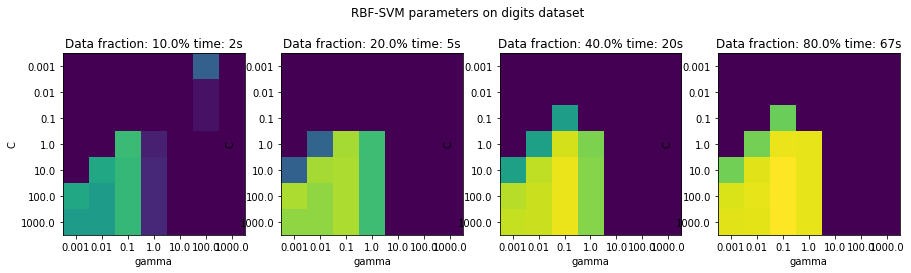

In [96]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(results[i].values, vmin=.8, vmax=.99)
    ax.set_title("Data fraction: {}% time: {:.0f}s".format(train_sizes[i] * 100, tot_time[i]))
    ax.set_xticks(np.arange(7))
    ax.set_xticklabels(param_grid['gamma'])
    ax.set_xlabel('gamma')
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(param_grid['C'])
    ax.set_ylabel('C')
plt.suptitle("RBF-SVM parameters on digits dataset")
plt.savefig("images/multi-fidelity-digits.png")

# n_estimators in Random Forest

In [62]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_features=2).fit(digits.data, digits.target)
tree.get_depth()

19

In [67]:
param_grid_rf = {'max_depth': [1, 2, 4, 8, 12, 16, 19], 'max_features': [2, 4, 8, 16, 32, 64]}
tot_time_rf = []
results_rf = []
n_estimators = [10, 40, 80, 160]
X_train, X_test, y_train, y_test = train_test_split(X / 16., y, stratify=y, random_state=1)

for n_ests in n_estimators:
    grid_search = GridSearchCV(RandomForestClassifier(n_estimators=n_ests), param_grid=param_grid_rf, iid=False)
    start = time.time()
    grid_search.fit(X_train, y_train)
    tot_time_rf.append(time.time() - start)
    res = pd.DataFrame(grid_search.cv_results_).pivot(index='param_max_depth', columns='param_max_features', values='mean_test_score')
    results_rf.append(res)

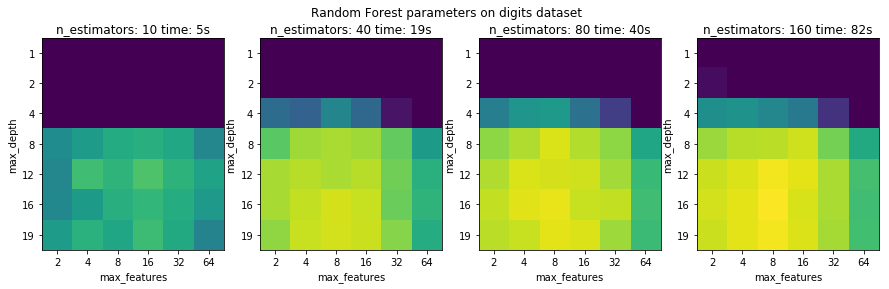

In [100]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

for i, ax in enumerate(axes):
    im = ax.imshow(results_rf[i].values, vmin=.85, vmax=.98)
    ax.set_title("n_estimators: {} time: {:.0f}s".format(n_estimators[i], tot_time_rf[i]))
    ax.set_xticks(np.arange(len(param_grid_rf['max_features'])))
    ax.set_xticklabels(param_grid_rf['max_features'])
    ax.set_xlabel('max_features')
    ax.set_yticks(np.arange(len(param_grid_rf['max_depth'])))
    ax.set_yticklabels(param_grid_rf['max_depth'])
    ax.set_ylabel('max_depth')
#plt.colorbar(im, ax=axes)
plt.suptitle("Random Forest parameters on digits dataset")
plt.savefig("images/multi-fidelity-digits-rf.png")

In [103]:
np.log2(10000)

13.287712379549449

In [104]:
from  civismlext import HyperbandSearchCV

In [297]:
# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}



# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


In [109]:
hp = HyperbandSearchCV(clf, param_distributions=param_dist, cost_parameter_max={'n_estimators': 200}, verbose=10)

In [ ]:
hp.fit(X_train, y_train)

In [299]:
from halving import GridSuccessiveHalving
sh = GridSuccessiveHalving(clf, param_grid=param_grid, random_state=0)
start = time.time()
sh.fit(X_train, y_train)

print("Successive Halving took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(sh.cv_results_['params'])))
report(sh.cv_results_)

7
n_samples_iter: 100
n_samples_iter: 100


/home/andy/checkout/scikit-learn/sklearn/model_selection/_split.py:643: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


n_samples_iter: 100


/home/andy/checkout/scikit-learn/sklearn/model_selection/_split.py:643: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


n_samples_iter: 100
n_samples_iter: 100
n_samples_iter: 100
n_samples_iter: 100
Successive Halving took 12.32 seconds for 145 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.885 (std: 0.035)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.875 (std: 0.064)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.866 (std: 0.072)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 3}



In [23]:
sh.score(X_test, y_test)

0.9594285714285714

In [ ]:
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, iid=False, verbose=10, random_state=0)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)


In [32]:
import pandas as pd
#.groupby("params").plot(x="iter", y="mean_test_score")

In [25]:
random_search.score(X_test, y_test)

0.9583428571428572

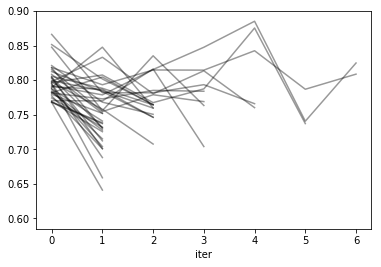

In [300]:
res = pd.DataFrame(sh.cv_results_)
res['params_str'] = res.params.apply(str)
reshape = res.pivot(index='iter', columns='params_str', values='mean_test_score')
reshape.plot(legend=False, alpha=.4, c='k')

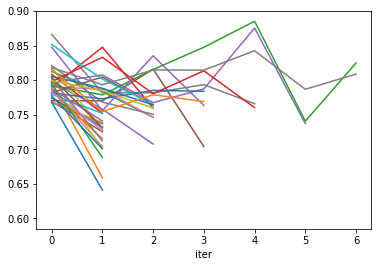

In [301]:
import matplotlib.pyplot as plt
res.groupby("params_str").plot('iter', 'mean_test_score', ax=plt.gca(), legend=False);
plt.savefig("images/halving_curve.png")

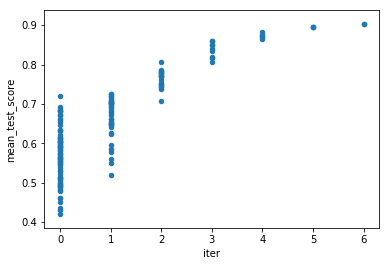

In [38]:
%matplotlib inline
res.plot('iter', 'mean_test_score', kind='scatter')

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X / 255., y, stratify=y, random_state=0, train_size=1000)


/home/andy/checkout/scikit-learn/sklearn/model_selection/_split.py:2184: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
from sklearn.svm import SVC
param_grid = {'gamma': np.logspace(-3, 2, 6), 'C': np.logspace(-3, 2, 6)}
param_grid

{'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}

In [ ]:
# run grid search
grid_search = GridSearchCV(SVC(), param_grid=param_grid, iid=False, verbose=0)
start = time.time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X / 255., y, stratify=y, random_state=0)

sh = GridSuccessiveHalving(SVC(), param_grid=param_grid, random_state=0, verbose=0)
start = time.time()
sh.fit(X_train, y_train)

print("Successive Halving took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(sh.cv_results_['params'])))
report(sh.cv_results_)

In [75]:
grid_search.score(X_test, y_test)


0.9194666666666667

In [10]:
sh.score(X_test, y_test)

0.9187536231884058

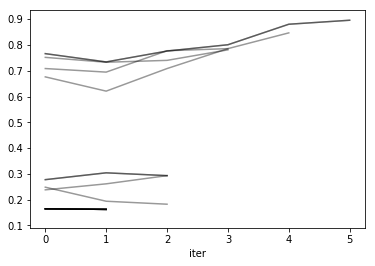

In [5]:
%matplotlib inline
import pandas as pd

res = pd.DataFrame(sh.cv_results_)
res['params_str'] = res.params.apply(str)
reshape = res.pivot(index='iter', columns='params_str', values='mean_test_score')
reshape.plot(legend=False, alpha=.4, c='k')

In [6]:
reshape

params_str  {'C': 0.001, 'gamma': 0.001}  {'C': 0.001, 'gamma': 0.01}  \
iter                                                                    
0                               0.164668                     0.164668   
1                               0.162487                          NaN   
2                                    NaN                          NaN   
3                                    NaN                          NaN   
4                                    NaN                          NaN   
5                                    NaN                          NaN   

params_str  {'C': 0.001, 'gamma': 0.1}  {'C': 0.001, 'gamma': 1.0}  \
iter                                                                 
0                             0.129374                    0.129374   
1                                  NaN                         NaN   
2                                  NaN                         NaN   
3                                  NaN                         NaN   
4                                  NaN                         NaN   
5                                  NaN                         NaN   

params_str  {'C': 0.001, 'gamma': 10.0}  {'C': 0.001, 'gamma': 100.0}  \
iter                                                                    
0                              0.164668                      0.141138   
1                                   NaN                           NaN   
2                                   NaN                           NaN   
3                                   NaN                           NaN   
4                                   NaN                           NaN   
5                                   NaN                           NaN   

params_str  {'C': 0.01, 'gamma': 0.001}  {'C': 0.01, 'gamma': 0.01}  \
iter                                                                  
0                              0.164668                    0.164668   
1                              0.162487                    0.162487   
2                                   NaN                         NaN   
3                                   NaN                         NaN   
4                                   NaN                         NaN   
5                                   NaN                         NaN   

params_str  {'C': 0.01, 'gamma': 0.1}  {'C': 0.01, 'gamma': 1.0}  \
iter                                                               
0                            0.129374                   0.129374   
1                                 NaN                        NaN   
2                                 NaN                        NaN   
3                                 NaN                        NaN   
4                                 NaN                        NaN   
5                                 NaN                        NaN   

params_str              ...               {'C': 10.0, 'gamma': 0.1}  \
iter                    ...                                           
0                       ...                                0.277687   
1                       ...                                0.304140   
2                       ...                                0.293254   
3                       ...                                     NaN   
4                       ...                                     NaN   
5                       ...                                     NaN   

params_str  {'C': 10.0, 'gamma': 1.0}  {'C': 10.0, 'gamma': 10.0}  \
iter                                                                
0                            0.129374                    0.164668   
1                                 NaN                    0.162487   
2                                 NaN                         NaN   
3                                 NaN                         NaN   
4                                 NaN                         NaN   
5                                 NaN                         NaN   

params_str  {'C': 10.0, 'gamma': 

In [7]:
bla = res.groupby('params_str')['mean_test_score'].median()

In [8]:
new = res.drop_duplicates(subset='params_str', keep='last')[['param_gamma', 'param_C', 'mean_test_score']]

In [9]:
new.pivot(index='param_C', columns='param_gamma')

mean_test_score                                                  
param_gamma         0.001     0.010     0.100     1.000     10.000    100.000
param_C                                                                      
0.001              0.162487  0.164668  0.129374  0.129374  0.164668  0.141138
0.010              0.162487  0.162487  0.129374  0.129374  0.162487  0.141138
0.100              0.162487  0.164668  0.129374  0.129374  0.162487  0.141138
1.000              0.182540  0.846617  0.293254  0.129374  0.162487  0.141138
10.000             0.785551  0.895587  0.293254  0.129374  0.162487  0.141138
100.000            0.780840  0.895587  0.293254  0.129374  0.162487  0.141138

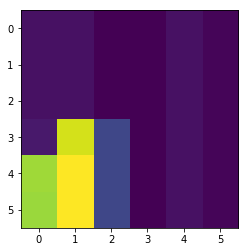

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(new.pivot(index='param_C', columns='param_gamma'))

In [10]:
res.drop_duplicates(subset='params_str', keep='last')[['param_gamma', 'param_C', 'iter']].pivot(index='param_C', columns='param_gamma')

iter                                        
param_gamma 0.001   0.010   0.100   1.000   10.000  100.000
param_C                                                    
0.001             1       0       0       0       0       0
0.010             1       1       0       0       1       0
0.100             1       0       0       0       1       0
1.000             2       4       2       0       1       0
10.000            3       5       2       0       1       0
100.000           3       5       2       0       1       0

In [3]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
start = time.time()
LogisticRegressionCV(multi_class='multinomial', solver='sag').fit(X_train, y_train)
print(time.time() - start)

In [226]:
np.logspace(-3, 2, 6)

array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ])

In [284]:
27 * 3

81

In [290]:
n_params = 81
n_samples = 10000
eta = 3.
budget = 23000

In [291]:
l = np.arange(15)

In [292]:
s = np.where(np.floor(n_params * n_samples * (l + 1) * eta ** -l) < budget)[0].min()
s

5

In [293]:
s = 5

In [294]:
resources_spent = 0
for k in range(0, s + 1):
    n_params_left = np.floor(n_params*eta ** -k)
    if n_params_left < 1:
        break
    resources =  np.floor(n_samples * eta ** (k - s))
    resources_spent += n_params_left * resources
    print("train {} configurations with resources {}".format(int(n_params_left), int(resources)))
print("resources total: {}".format(resources_spent))

train 81 configurations with resources 41
train 27 configurations with resources 123
train 9 configurations with resources 370
train 3 configurations with resources 1111
train 1 configurations with resources 3333
resources total: 16638.0


In [246]:
k

5

In [139]:
n_params

16